# Imports

In [1]:
import sys
import os
sys.path.insert(0,'/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/')
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from reproject import reproject_interp
from scipy.interpolate import interp1d
import copy

from minot.ClusterTools import map_tools
import pitszi

import macsj0717_libs as libs

sigma2fwhm = 2 * np.sqrt(2*np.log(2))

# Parameters

In [2]:
outdir = '/Users/adam/Project/Notes-Papier-Conf/2024_07_PITSZI_MACSJ0717/outputs/'

# Cluster parameters
cl_redshift = 0.546
cl_M500     = 20*1e14*u.Msun
cl_coord    = SkyCoord(109.3806*u.deg, 37.7583*u.deg, frame='icrs')

# Sampling
reso = 4*u.arcsec
FoV  = 4*u.arcmin
los_reso = 30*u.kpc
los_size = 8*u.Mpc

# Analysis parameters
ps_mask_lim = 0.1*100 # mJy
mask_theta = 2*u.arcmin
Nsim = 1000
apply_radial_model = True
clean_ksz = False

# Get the data

In [3]:
#===== Instrument parameters
beam_FWHM    = 18.2*u.arcsec
FoV_diameter = 2*u.arcmin
TF = libs.get_TF()

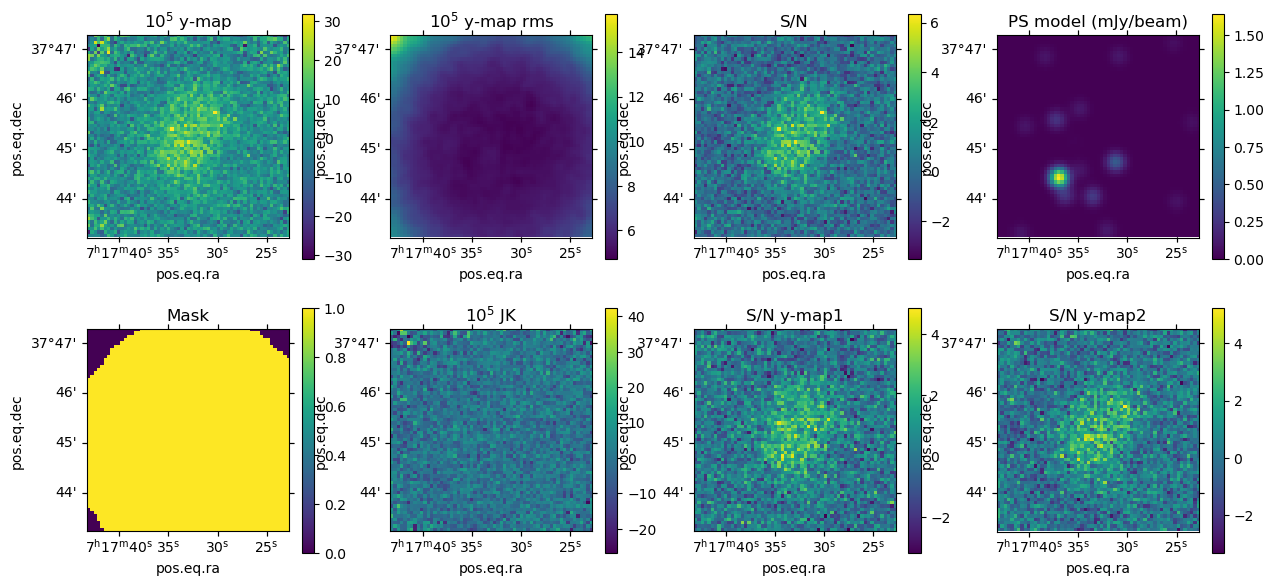

In [4]:
#===== Get the data
cl_head, y2jy, cl_img, cl_img1, cl_img2, cl_jk, cl_ps, cl_rms, cl_noise, cl_mask = libs.extract_data(FoV, reso, 
                                                                                                     ps_mask_lim,
                                                                                                     show=True,
                                                                                                     clean_ksz=clean_ksz)

# Define the model, data and inference

In [5]:
#========== cluster data
cl_data  = libs.def_data(cl_img,  cl_head, cl_noise, cl_mask, beam_FWHM, TF, outdir, Nsim)

In [6]:
#========== cluster model
cl_model = pitszi.Model(name='Model', RA=cl_coord.ra, Dec=cl_coord.dec, 
                        redshift=cl_redshift, M500=cl_M500, 
                        silent=True, output_dir=outdir)
cl_model.set_pressure_profile_universal_param('A10MD')
cl_model.map_header = cl_head
cl_model.los_reso  = los_reso
cl_model.los_size  = los_size
cl_model.R_truncation = 10*u.Mpc

In [7]:
#========== Inference radial
cl_Rinfer1 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit1/')
cl_Rinfer2 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit2/')
cl_Rinfer3 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit3/')
cl_Rinfer4 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit4/')
cl_Rinfer5 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit5/')

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                    Radial Inference                        
------------------------------------------------------------
                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                    Radi

# Fit the smooth model to the data

In [8]:
#========== Curvefit the profile case 1
fitpar_prof = libs.def_fitparprof(3)
plist, popt, pcov = cl_Rinfer1.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (M500): 
   median   = 26.470299875994684 -0.8793760821168775 +0.8911575845385258
   best-fit = 26.42456879149357 -0.8336449976157638 +0.9368886690396394
   M500 = 26.470299875994684_{-0.8793760821168775}^{0.8911575845385258}
param 1 (RA): 
   median   = 109.3868760572906 -0.0003699217471648808 +0.0003593293473613812
   best-fit = 109.38647561789624 --3.051764720396477e-05 +0.0007597687417302268
   RA = 109.3868760572906_{-0.0003699217471648808}^{0.0003593293473613812}
param 2 (Dec): 
   median   = 37.752989439520974 -0.0003484206742569995 +0.00035469120456355085
   best-fit = 37.753001755261764 -0.0003607364150468584 +0.000342375463773692
   Dec = 37.752989439520974_{-0.0003484206742569995}^{0.00035469120456355085}
param 3 (min_to_maj_axis_ratio): 
   median   = 0.7823066392638409 -0.025812059646221686 +0.02612113915866421
   best-fit = 0.7988150785291586 -0.04232049891153933 +0.009612699893346566
   min_to_maj_axis_ratio = 0.7823066392638409_{-0.025812059646221686}^{0.0261211

In [9]:
#========== Curvefit the profile case 2
fitpar_prof = libs.def_fitparprof(1)
plist, popt, pcov = cl_Rinfer2.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (M500): 
   median   = 18.139231857400606 -0.48186033060666134 +0.49695756079760756
   best-fit = 18.141089939292804 -0.4837184124988596 +0.4950994789054093
   M500 = 18.139231857400606_{-0.48186033060666134}^{0.49695756079760756}
param 1 (ZL): 
   median   = 1.8310360449582968e-05 -9.807455974913273e-07 +9.839138100484985e-07
   best-fit = 1.861290786755163e-05 -1.2832930154599904e-06 +6.813663920798354e-07
   ZL = 1.8310360449582968e-05_{-9.807455974913273e-07}^{9.839138100484985e-07}


In [10]:
#========== Curvefit the profile case 3
fitpar_prof = libs.def_fitparprof(2)
plist, popt, pcov = cl_Rinfer3.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (M500): 
   median   = 21.674943566082483 -0.5328639252019869 +0.5191301321067314
   best-fit = 21.662439662032753 -0.520360021152257 +0.5316340361564613
   M500 = 21.674943566082483_{-0.5328639252019869}^{0.5191301321067314}
param 1 (RA): 
   median   = 109.38704610298845 -0.00038704577477233215 +0.0003942543585679914
   best-fit = 109.38717018611698 -0.0005111289032981858 +0.0002701712300421377
   RA = 109.38704610298845_{-0.00038704577477233215}^{0.0003942543585679914}
param 2 (Dec): 
   median   = 37.75297634222669 -0.0003069943331297509 +0.00032011596720593616
   best-fit = 37.75281174972105 -0.00014240182748892494 +0.0004847084728467621
   Dec = 37.75297634222669_{-0.0003069943331297509}^{0.00032011596720593616}
param 3 (ZL): 
   median   = 1.5884926326233068e-05 -1.0125698361395695e-06 +9.980563131962017e-07
   best-fit = 1.7888173259036e-05 -3.015816768942501e-06 +-1.0051906196067298e-06
   ZL = 1.5884926326233068e-05_{-1.0125698361395695e-06}^{9.980563131962017e-07}


In [11]:
#========== Curvefit the profile
fitpar_prof = libs.def_fitparprof(4)
plist, popt, pcov = cl_Rinfer4.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (P_0): 
   median   = 0.11650425683286762 -0.0077385894942104405 +0.007795434461938408
   best-fit = 0.11706476605100448 -0.008299098712347297 +0.0072349252438015516
   P_0 = 0.11650425683286762_{-0.0077385894942104405}^{0.007795434461938408}
param 1 (r_p): 
   median   = 852.7125390439037 -43.42895376249169 +44.98962990093003
   best-fit = 853.2312213338504 -43.947636052438384 +44.47094761098333
   r_p = 852.7125390439037_{-43.42895376249169}^{44.98962990093003}
param 2 (RA): 
   median   = 109.38730543387815 -0.00027881066583290703 +0.0002802789908429304
   best-fit = 109.38762923706494 -0.0006026138526209479 +-4.352419594511048e-05
   RA = 109.38730543387815_{-0.00027881066583290703}^{0.0002802789908429304}
param 3 (Dec): 
   median   = 37.752928465163215 -0.0002817885169363876 +0.0002783226171700903
   best-fit = 37.752403230549405 --0.0002434460968743224 +0.0008035572309808003
   Dec = 37.752928465163215_{-0.0002817885169363876}^{0.0002783226171700903}
param 4 (min_to_maj_

In [12]:
#========== Curvefit the profile
fitpar_prof = libs.def_fitparprof(5)
plist, popt, pcov = cl_Rinfer5.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (P_0): 
   median   = 0.10105332023203527 -0.012030665236243049 +0.00953088374307312
   best-fit = 0.092661769202753 -0.0036391142069607807 +0.01792243477235539
   P_0 = 0.10105332023203527_{-0.012030665236243049}^{0.00953088374307312}
param 1 (r_p): 
   median   = 427.4398952821399 -35.51688562118943 +29.138772605246857
   best-fit = 463.18583495395615 -71.26282529300568 +-6.607167066569389
   r_p = 427.4398952821399_{-35.51688562118943}^{29.138772605246857}
param 2 (a): 
   median   = 8.606463138631547 -1.4525534900006294 +0.9618000354800404
   best-fit = 6.055094620801844 --1.0988150278290734 +3.513168553309743
   a = 8.606463138631547_{-1.4525534900006294}^{0.9618000354800404}
param 3 (b): 
   median   = 6.125960891895609 -1.861910754352329 +1.3196692773879128
   best-fit = 6.084286589181241 -1.8202364516379612 +1.3613435801022806
   b = 6.125960891895609_{-1.861910754352329}^{1.3196692773879128}
param 4 (c): 
   median   = 0.1208887309298996 -0.08435754892028771 +0.1256763

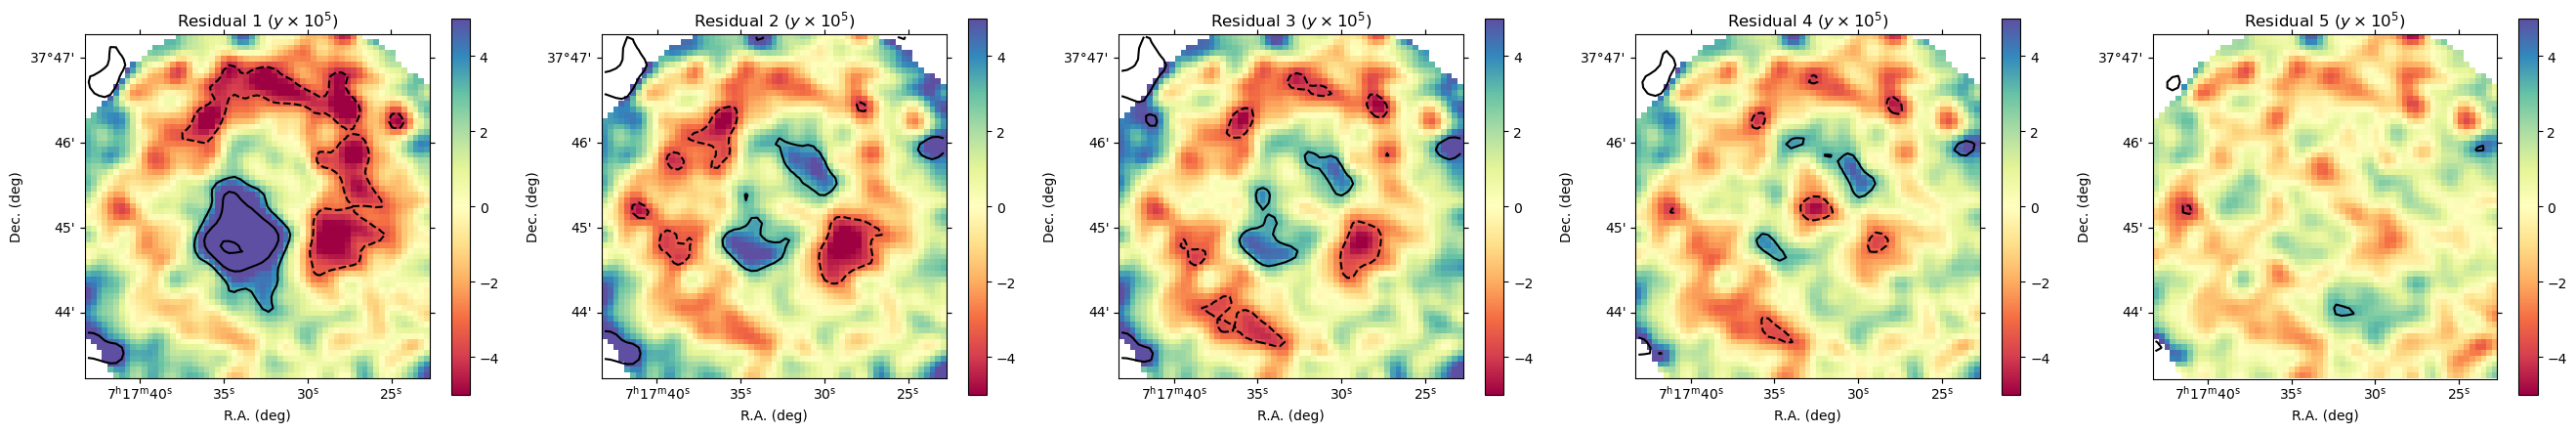

In [13]:
#===== Show the images

smooth_FWHM = 15*u.arcsec

# Show the data
plt.rcParams.update({'font.size': 10})
fig = plt.figure(0, figsize=(33, 5))
model_sph1 = cl_Rinfer1.get_radial_model()
model_sph2 = cl_Rinfer2.get_radial_model()
model_sph3 = cl_Rinfer3.get_radial_model()
model_sph4 = cl_Rinfer4.get_radial_model()
model_sph5 = cl_Rinfer5.get_radial_model()
    
rms = cl_data.get_noise_rms_from_model(Nmc=Nsim, smooth_fwhm=smooth_FWHM)
rms = gaussian_filter(rms, sigma=10/3600/sigma2fwhm/cl_head['CDELT2'])
    
rng = [-5,5]

msk = copy.deepcopy(cl_data.mask)
msk[cl_data.mask == 0] = np.nan
    
#----- Residual 1
ax = plt.subplot(1, 5, 1, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph2, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph2, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 1 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')
    
#----- Cluster model
ax = plt.subplot(1, 5, 2, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph3, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph3, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 2 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

#----- Residual model
ax = plt.subplot(1, 5, 3, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph1, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph1, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 3 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

#----- Residual model
ax = plt.subplot(1, 5, 4, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph4, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph4, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 4 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

#----- Residual model
ax = plt.subplot(1, 5, 5, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph5, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph5, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 5 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

plt.savefig(outdir+'/RadialFit_residuals.pdf')